#### Imports

In [1]:
import pandas as pd
import networkx as nx
import community as community_louvain

from pyvis.network import Network

In [2]:
# Create a graph from a pandas dataframe 
bk1_demo = pd.read_csv("data/book1_demoDF.csv")

G = nx.from_pandas_edgelist(bk1_demo, 
                            source = "source",
                            target = "target",
                            edge_attr = "value",
                            create_using = nx.Graph())

### Pyvis Community Detection Graph Visualization - Demo

##### Degree of Centrality

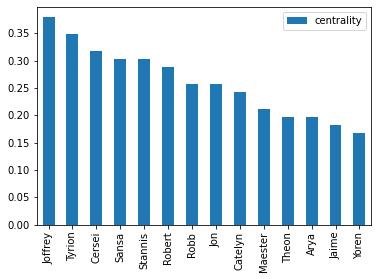

In [3]:
# Degree of centrality 
degree_dict = nx.degree_centrality(G)
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])

# Plot top 15 nodes
degree_df.sort_values('centrality', ascending=False)[0:14].plot(kind="bar")

##### Betweenness Centrality

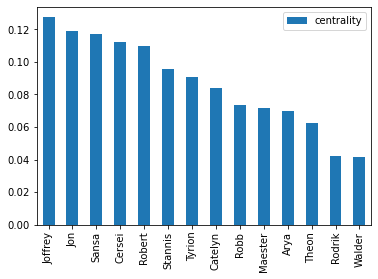

In [4]:
# Betweenness centrality 
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])

# Plot top 15 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:14].plot(kind="bar")

##### Closeness Centrality

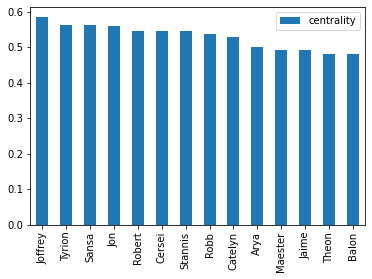

In [5]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])

# Plot top 15 nodes 
closeness_df.sort_values('centrality', ascending=False)[0:14].plot(kind="bar")

#### Community Detection

In [8]:
communities = community_louvain.best_partition(G)

# Save centrality measures 
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'degree_betweenness')
nx.set_node_attributes(G, closeness_dict, 'degree_closeness')
nx.set_node_attributes(G, communities, 'group')

# Graph visualization - Pyvis
com_net = Network(notebook = True, width="900px", height="900px", bgcolor='#222222', font_color='white', select_menu=True)
com_net.from_nx(G)
com_net.from_nx(G)
com_net.show("GOT_com.html")

GOT_com.html
